In [1]:
import pandas as pd
import numpy as np

# Load The Dataset

In [2]:
df=pd.read_csv('student_performance_data.csv')
df.head()

,Attendance (%),Assignment Completion (%),Test Score (25%),Practical Score (25%),Exam Score (50%),Performance,Age,Gender,Marital Status,Children (if Married),Mother Education,Father Education,Guardian (Sponsor),Extracurricular Activities,Online Time (Daily),Family Relationship,Free Time Activities,Alcoholic Consumption,Religious Programs (Weekly),Computer/Laptop Access (for Practicals)
0,95,86,12,17,33,B,21,Female,Engaged,0,College,Bachelor's Degree,Uncle,No,3,Average,Watching TV,High,0,Yes
1,78,92,19,14,26,C,25,Male,Married,0,College,Doctorate,Father,No,9,Average,Socializing,Low,5,Yes
2,97,87,23,11,35,B,19,Male,Engaged,0,High School,Doctorate,Mother,Yes,5,Poor,Socializing,High,0,Yes
3,74,69,12,9,19,D,24,Male,Single,0,High School,Doctorate,Brother,No,3,Good,Sports,Moderate,4,Yes
4,62,74,10,17,19,D,21,Female,Single,0,College,College,Sister,No,9,Average,Sports,Low,1,No


# Data Preprocessing

## Remove Un-Necessary Columns

In [3]:
df.drop(columns=['Age','Gender','Marital Status','Children (if Married)','Guardian (Sponsor)','Computer/Laptop Access (for Practicals)','Alcoholic Consumption','Extracurricular Activities','Mother Education','Father Education','Free Time Activities','Family Relationship','Online Time (Daily)','Religious Programs (Weekly)'],inplace=True)			

In [4]:
df.head()

,Attendance (%),Assignment Completion (%),Test Score (25%),Practical Score (25%),Exam Score (50%),Performance
0,95,86,12,17,33,B
1,78,92,19,14,26,C
2,97,87,23,11,35,B
3,74,69,12,9,19,D
4,62,74,10,17,19,D


## Data Encoding

In [5]:
# ordinal encoding library
from sklearn.preprocessing import OrdinalEncoder

In [6]:
# order of grades for encoding
performance_order = ['F','E','D', 'C', 'B', 'A']

# Initialize the OrdinalEncoder with custom categories
oe=OrdinalEncoder(categories=[performance_order])

In [7]:
# Apply the encoding and replace the 'Performance' column
df['Performance'] = oe.fit_transform(df[['Performance']])

In [8]:
# Transformed dataframe
df.head()

,Attendance (%),Assignment Completion (%),Test Score (25%),Practical Score (25%),Exam Score (50%),Performance
0,95,86,12,17,33,4.0
1,78,92,19,14,26,3.0
2,97,87,23,11,35,4.0
3,74,69,12,9,19,2.0
4,62,74,10,17,19,2.0


# Train & Test Data Seperation

In [9]:
x=df.drop(columns=['Performance'])

In [10]:
y=df.Performance

In [11]:
x

,Attendance (%),Assignment Completion (%),Test Score (25%),Practical Score (25%),Exam Score (50%)
0,95,86,12,17,33
1,78,92,19,14,26
2,97,87,23,11,35
3,74,69,12,9,19
4,62,74,10,17,19
...,...,...,...,...,...
4995,83,86,13,9,29
4996,88,92,17,11,31
4997,93,85,10,11,31
4998,97,77,21,22,42


In [12]:
y

0       4.0
1       3.0
2       4.0
3       2.0
4       2.0
       ... 
4995    3.0
4996    3.0
4997    3.0
4998    5.0
4999    5.0
Name: Performance, Length: 5000, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Dataset Modeling ANN

In [15]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(5,)),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(6, activation='softmax')
])


C:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,366 (13.15 KB)

 Trainable params: 3,366 (13.15 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [21]:
history=model.fit(x_train,y_train,epochs=100, verbose=1,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3472 - loss: 2.1678 - val_accuracy: 0.5500 - val_loss: 1.1700
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5565 - loss: 1.0579 - val_accuracy: 0.6550 - val_loss: 0.7660
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.7791 - val_accuracy: 0.6850 - val_loss: 0.7006
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.7271 - val_accuracy: 0.6950 - val_loss: 0.6861
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.6824 - val_accuracy: 0.6450 - val_loss: 0.7415
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.6726 - val_accuracy: 0.6450 - val_loss: 0.7803
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7066 - loss: 0.6898 - val_accuracy: 0.6825 - val_loss: 0.6439
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.6356 - val_accu

# Graph Representation of Loss & accuracy

## 1. Loss

In [22]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

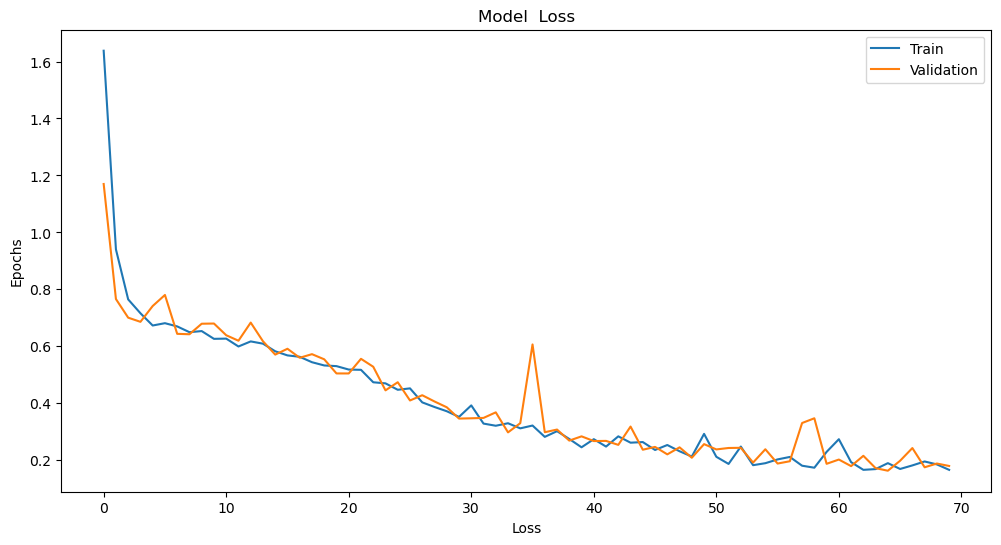

In [23]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model  Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

## 2. Accuracy

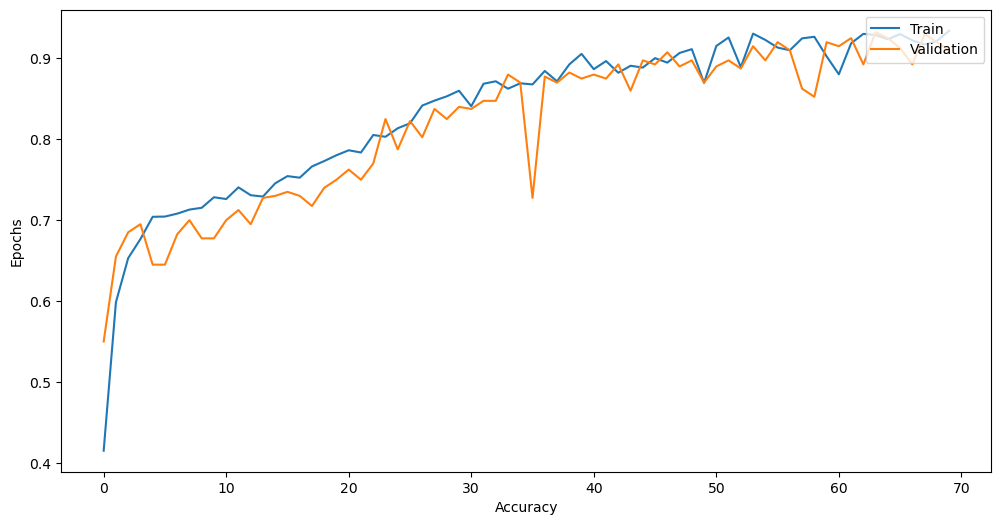

In [24]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

# Evaluation On Test Data

In [25]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss:{loss}")
print(f"Test Accuracy:{accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9409 - loss: 0.1480
Test Loss:0.14963595569133759
Test Accuracy:0.9390000104904175


In [27]:
# Predict the probabilities and get predicted class labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


# Confusion Matrix On Test Data

In [28]:
cm = confusion_matrix(y_test, y_pred_classes)

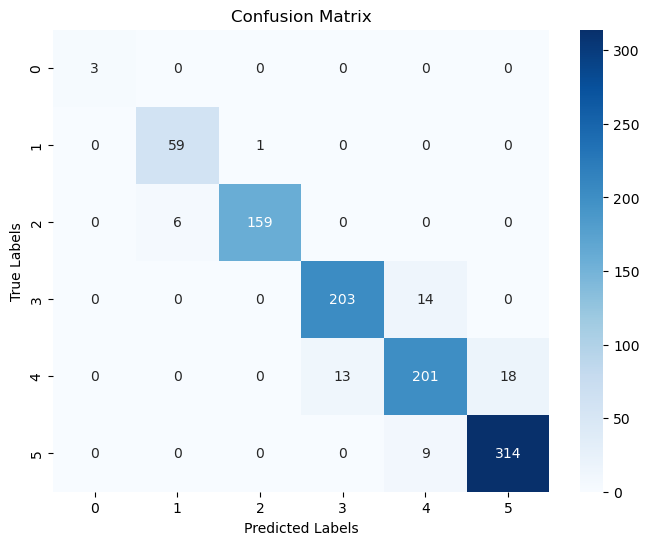

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(6), yticklabels=np.arange(6))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate Metrics

In [32]:
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

In [33]:
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")


Precision (weighted): 0.9390366265121536
Recall (weighted): 0.939
F1 Score (weighted): 0.9387667879897345
